# Исследование данных о продаже компьютерных игр

В нашем распоряжении есть исторические данные о продажах игр. 

Целью исследования является выявление закономерностей, определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

По каждой игре доступны данные о платформе, жанре, продажах в различных регионах, оценках пользователей и критиков, возрастной категории от организации ESRB.

## Исследование общей информации о данных

In [1]:
# загрузка необходимых библиотек
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка данных и вывод общей иформации
data = pd.read_csv('/datasets/games.csv')
display(data.head())
print(data.info())
print('Количество дубликатов строк:', data.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Количество дубликатов строк: 0


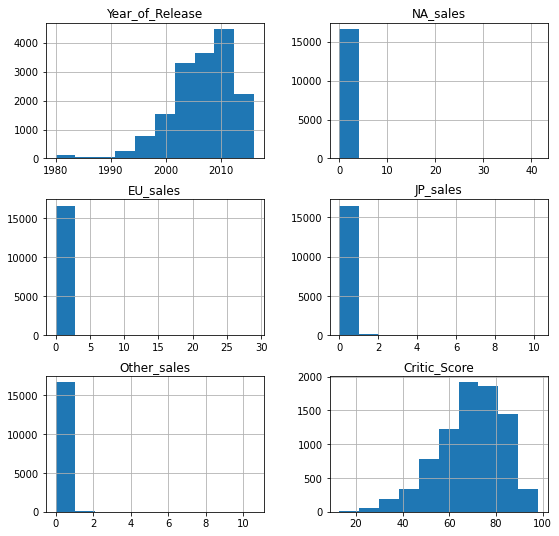

In [3]:
data.hist(figsize=(9,9));

In [4]:
display(data.corr())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [5]:
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


На данном этапе мы получили датафрейм с данными о продаже игр и предварительно с ним ознакомились. Выяснили, что в датафрейме содержатся данные о 16715 играх, в некоторых столбцах есть пропущенные значения. Выяснили, что в данных нет полных дубликатов.

Построенные гистограммы и выведенная информация о датафрейме вызвали вопросы к следующием столбцам:

- в столбцах с продажами по регионам (`NA_sales`,	`EU_sales`,	`JP_sales`,	`Other_sales`) есть выбросы в данных;
- в столбцах `User_Score` и `Year_of_Release` неверный тип данных;
- в столбцах `Name` и `Year_of_Release` есть небольшое количество пропусков;
- в столбцах `Critic_Score`, `User_Score`, `Rating` есть пропуки в данных, скорее всего большинство в одних и тех же строках.

## Предобработка данных

In [6]:
data = data.rename(columns=str.lower)

In [7]:
data = data.dropna(subset=['name', 'year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
# найдем дубликаты по связке столбцов name и platform
display(data.loc[data.duplicated(subset=['name', 'platform'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
# важен еще и год выпуска, удалим дубликат по этоим криитериям
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [11]:
# анализ данных по оценкам пользователей
data['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.9       2
1         2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [12]:
# замена tbd индикаторным значением, изменение типа данных
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = -1
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
print(data['user_score'].value_counts(dropna=False))
data.head(10)
data.info()

 NaN    6605
-1.0    2376
 7.8     322
 8.0     285
 8.2     276
        ... 
 1.5       2
 2.3       2
 1.9       2
 0.0       1
 9.7       1
Name: user_score, Length: 97, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB

In [13]:
# поиск пропусков в оценках критиков и пользователей
print('Количество строк с незаполненным рейтингом и оценками критиков и пользователей:', \
      len(data.loc[(data['user_score'].isna()) \
                   & (data['rating'].isna()) \
                   & (data['critic_score'].isna())]))
print('Количество платформ с заполненной оценкой пользователей:', data.loc[~(data['user_score'].isna())]['platform'].nunique())
print('Количество платформ с заполненной оценкой критиков:', data.loc[~(data['critic_score'].isna())]['platform'].nunique())
print('Количество платформ с заполненным рейтингом:', data.loc[~(data['rating'].isna())]['platform'].nunique())
print('Общее количество платформ:', data['platform'].nunique())

Количество строк с незаполненным рейтингом и оценками критиков и пользователей: 6534
Количество платформ с заполненной оценкой пользователей: 17
Количество платформ с заполненной оценкой критиков: 17
Количество платформ с заполненным рейтингом: 17
Общее количество платформ: 31


In [14]:
# заполнение пропусков в возрастной категории
data.loc[data['rating'].isna(), 'rating'] = 'undefined'
display(data.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5662,FIFA Street 3,X360,2008,Sports,0.14,0.14,0.00,0.03,63.0,6.9,E,0.31
1839,Fight Night Champion,PS3,2011,Fighting,0.45,0.49,0.00,0.18,84.0,7.3,M,1.12
16086,Donkey Kong Jungle Beat,Wii,2008,Platform,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
1473,Triple Play 2001,PS,2000,Sports,0.74,0.50,0.00,0.09,NaN,NaN,undefined,1.33
1944,Bully: Scholarship Edition,X360,2008,Action,0.53,0.40,0.03,0.11,80.0,8.3,T,1.07


 Переименовали столбцы, заменили типы данных на корректные: столбец `user_score` - `float64` и столбец `year_of_release` - `int64`.

Строки с пропусками в данных года выпуска и название удалили, таких строк было немного, заполнить корректным значением невозможно. Удалили найденный дубликат по критериям: год выпуска, название, платформа.

В колонке с оценками пользователей обнаружили значение tbd, это общепринятое сокращение "подлежит уточнению", эти данные заполнили индикаторным значением -1.

Обнаружили, что большая часть строк с пропусками в столбцах `user_score`, `critic_score`, `rating` - это одни и те же строки. Вероятно, по данным этих игр не велась статистика. Также выявили, что только 17 из 31 платформ предоставляют статистику. Решили не заполнять данные по оценкам пользователей и критиков, так как такая оценка субъективна. Столбец `rating` заполнили индикаторным значением `undefined`.

Создали столбец с общей суммой продаж по всем регионам.

## Исследовательский анализ данных

### Распределение продаж по годам

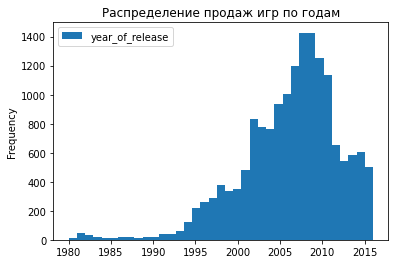

In [15]:
data['year_of_release'].plot(kind='hist', bins=37, legend=True, title='Распределение продаж игр по годам');

In [16]:
data.groupby(by='year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Данные по годам показывают, что в 2005 - 2011 годах были самые большие продажи игр, потом продажи существенно снизились, тенденция к снижению продолжается.

### Распределение продаж по платформам

In [17]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [18]:
platform_per_year = data.pivot_table(index='platform',\
                                    columns='year_of_release', values='total_sales', aggfunc='sum')
display(platform_per_year.head())

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN


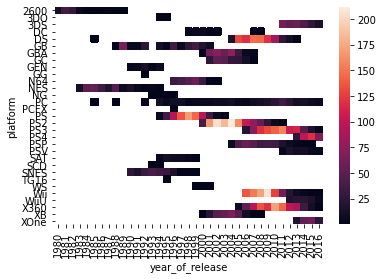

In [19]:
sns.heatmap(platform_per_year, xticklabels=1, yticklabels=1);

Мы сделали таблицу с продажами всех платформ по годам. Тепловая диаграмма показала, что весь анализируемый период не действовала ни одна платформа. В основном каждая действут около 10 лет. Дольше других существует платформа PC.

Продажи существенны только у некоторых платформ, часть из них уже не действует.

Для анализа имеет смысл смотреть данные с 2012 года по тем платформам, которые существуют на 2016 год.

In [20]:
# выделим актуальные данные для анализа
data_actual = data.query('year_of_release >= 2012')

In [21]:
# создадим список существующх на 2016 год платформ
existing_platform = data_actual.query('year_of_release == 2016')\
                        .groupby(by='platform')['total_sales']\
                        .sum()\
                        .reset_index()
existing_platform = list(existing_platform['platform'])
print('Список существующих платформ:', existing_platform)

Список существующих платформ: ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52
XOne,NaN,18.96,54.07,60.14,26.15


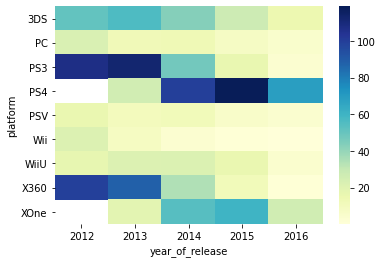

In [22]:
# построим данные по продажам на существующих платформах с 2012 года
existing_platform_per_year = platform_per_year.query('platform in @existing_platform')\
                                              .drop(platform_per_year.columns[0:-5], axis=1)
display(existing_platform_per_year)
sns.heatmap(existing_platform_per_year, cmap='YlGnBu');

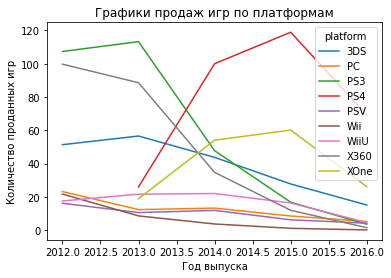

In [23]:
# построим графики продаж по годам
existing_platform_per_year.T.plot(title='Графики продаж игр по платформам', ylabel='Количество проданных игр', xlabel='Год выпуска');

In [24]:
# найдем самые прибыльные платформы из существующих
existing_platform_per_year['total'] = existing_platform_per_year[:].sum(axis=1)
existing_platform_per_year = existing_platform_per_year.sort_values(by='total', ascending=False)
display(existing_platform_per_year)
largest_platform = existing_platform_per_year.index[0:5]
print('Список самых крупных платформ:', largest_platform)

year_of_release,2012,2013,2014,2015,2016,total
platform,,,,,,
PS4,NaN,25.99,100.00,118.90,69.25,314.14
PS3,107.35,113.25,47.76,16.82,3.60,288.78
X360,99.74,88.58,34.74,11.96,1.52,236.54
3DS,51.36,56.57,43.76,27.78,15.14,194.61
XOne,NaN,18.96,54.07,60.14,26.15,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,82.19
PC,23.22,12.38,13.28,8.52,5.25,62.65
PSV,16.19,10.59,11.90,6.25,4.25,49.18
Wii,21.71,8.59,3.75,1.14,0.18,35.37


Список самых крупных платформ: Index(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype='object', name='platform')


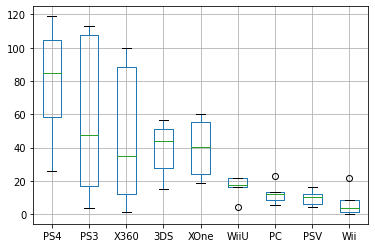

In [25]:
existing_platform_per_year.T[:-1].boxplot();

(0.0, 2.0)

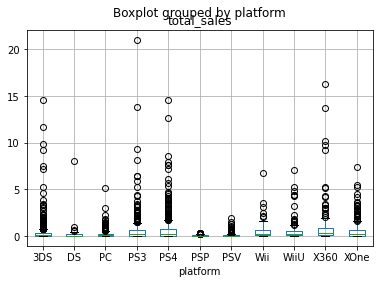

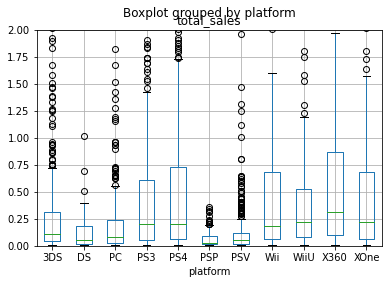

In [26]:
data_actual.boxplot(column='total_sales', by='platform');
data_actual.boxplot(column='total_sales', by='platform');
plt.ylim(0, 2)

Мы нашли 9 существующих на 2016 год платформ, проанализировали продажи по ним по годам, увидели что продажи по всем платформам падают. Не так сильно падают продажи игр на платформах PSV и Wii. Нашли платформы с самыми большими продажами за последние 5 лет. Создали список 5 таких платформ, в него вошли следующие платфомы: PS4, PS3, X360, 3DS, XOne.

График «ящик с усами» по продажам игр по годам в разбивке по платформам показал, что у платформы PS3 самый большой разброс в продажах по годам, что мы увидели также на обычном графике. С 2013 по 2015 год эта платформа сильно упала. В целом у самых популярных платформ сильнее всех упали продажи за анализируемый период. Медианное количество продаж игр по годам на платформе PS3 меньше, чем на платформе PS4.

Анализ распределения глобальных продаж по платформам показал, что в продажах игр существуют сильные выбросы, то есть небольшое количество игр продается существенно лучше других. Если говорить о медианном количестве продаж каждой игры, то больше всего оно у платформы X360, далее следуют платформы Wii и XOne, еще чуть ниже WiiU, PS3 и PS4. То же самое можно сказать о третьем квартиле и усах распределений то есть у названных платформ больше всего игр продается в болььших количествах.

В  списке крупных платформ по общим продажам на четвертом месте мы выявили платформу 3DS, но диаграмма размаха показала, что это происходит за счет выбросов, в медианное количество продаж игр этой платформы меньше.

Потенциально самыми прибыльными платформами мы считаем следуюие: X360, PS4, Wii, XOne, PS3, WiiU.

### Влияние отзывов пользователей и критиков на продажи

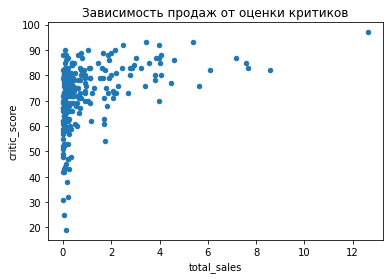

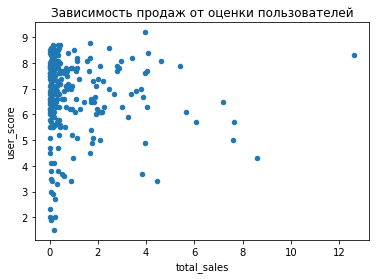

In [27]:
# построим диаграмму рассеяния
data_actual.query('platform == "PS4"')\
    .plot(kind='scatter', x='total_sales', y='critic_score',\
         legend=True, title='Зависимость продаж от оценки критиков');
data_actual.query('platform == "PS4" and user_score != -1')\
    .plot(kind='scatter', x='total_sales', y='user_score',\
         legend=True, title='Зависимость продаж от оценки пользователей');

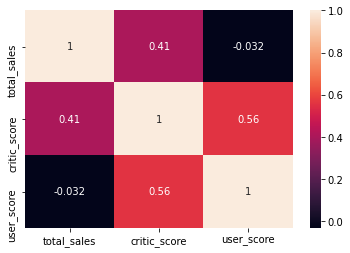

In [28]:
sns.heatmap(data_actual.query('platform == "PS4" and user_score != -1')[['total_sales', 'critic_score', 'user_score']]\
            .corr(), annot=True);

Для анализа взяли самую популярную платформу PS4. Построили диаграмму рассеяния, которая показала, большое количество продаж есть у игр с более высокими оценками пользователей и критиков. Но тем не менее есть игры с высокими оценками и низкими продажами. Построили матрицу корреляции, увидели что существует более сильная зависимость между оценкой критиков и продажами, чем между оценкой пользоваталей и продажами.

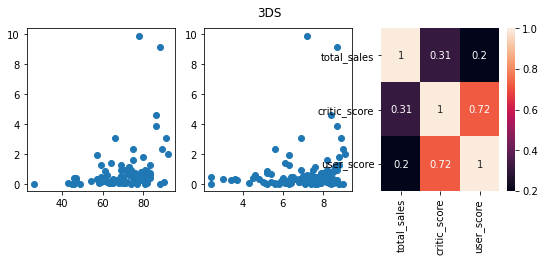

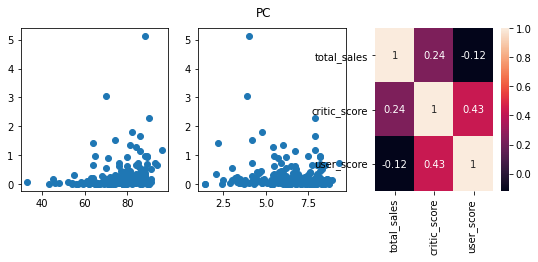

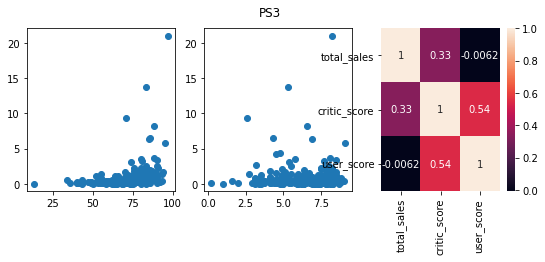

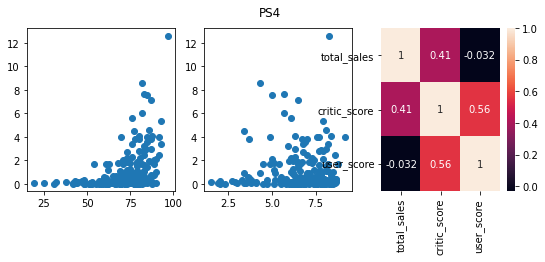

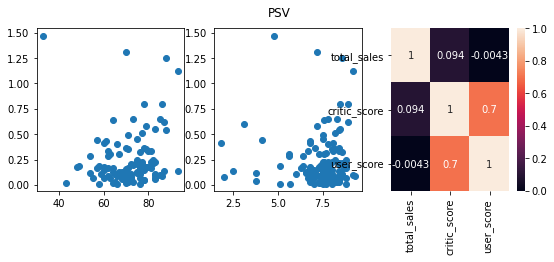

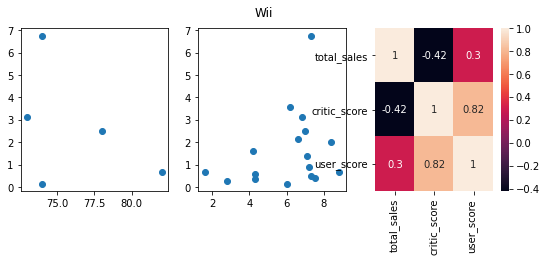

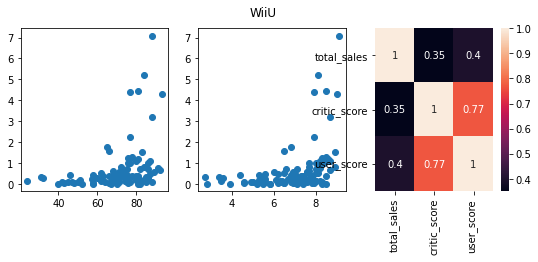

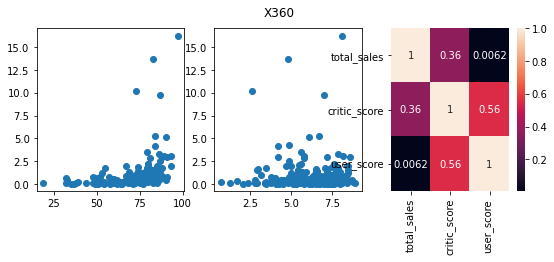

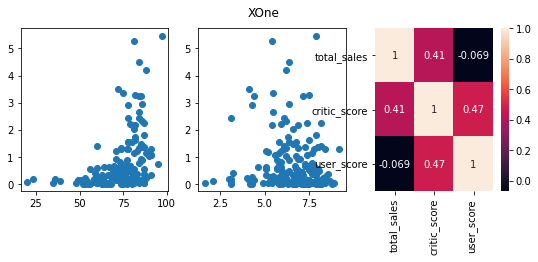

In [29]:
# построим диаграммы рассеяния по существующим платформам
for p in existing_platform:
    df = data_actual.loc[(data_actual['platform'] == p) & (data_actual['user_score'] != -1)]
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax[0].scatter(df['critic_score'], df['total_sales'])
    ax[1].scatter(df['user_score'], df['total_sales'])
    fig.suptitle(p)
    sns.heatmap(df[['total_sales', 'critic_score', 'user_score']].corr(), annot=True);

По другим крупным платформам картина подобная, с увеличением оценки критиков и пользователей растет число игр с большими продажами. Ни у одной платформы нет сильной корреляции между оценками и продажами. У платформы PSV корреляция между этими данными самая низкая. У платром Wii и WiiU мы обнаружили большую корреляцию между оценками пользователей и продажами, чем между оценками критиков и продажами.

### Распределение продаж по жанрам

total_sales                  
                   count     sum      mean
genre                                     
Action              1031  441.12  0.427856
Shooter              235  304.73  1.296723
Role-Playing         370  192.80  0.521081
Sports               267  181.06  0.678127
Misc                 192   85.04  0.442917
Platform              85   61.00  0.717647
Racing               115   53.50  0.465217
Fighting             109   44.49  0.408165
Simulation            80   35.12  0.439000
Adventure            302   29.43  0.097450
Strategy              71   13.34  0.187887
Puzzle                28    4.89  0.174643

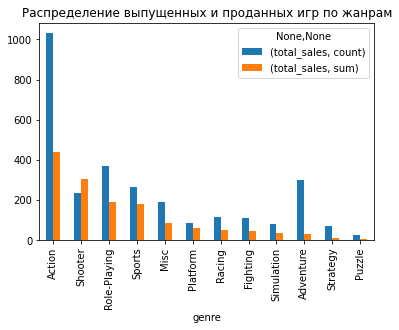

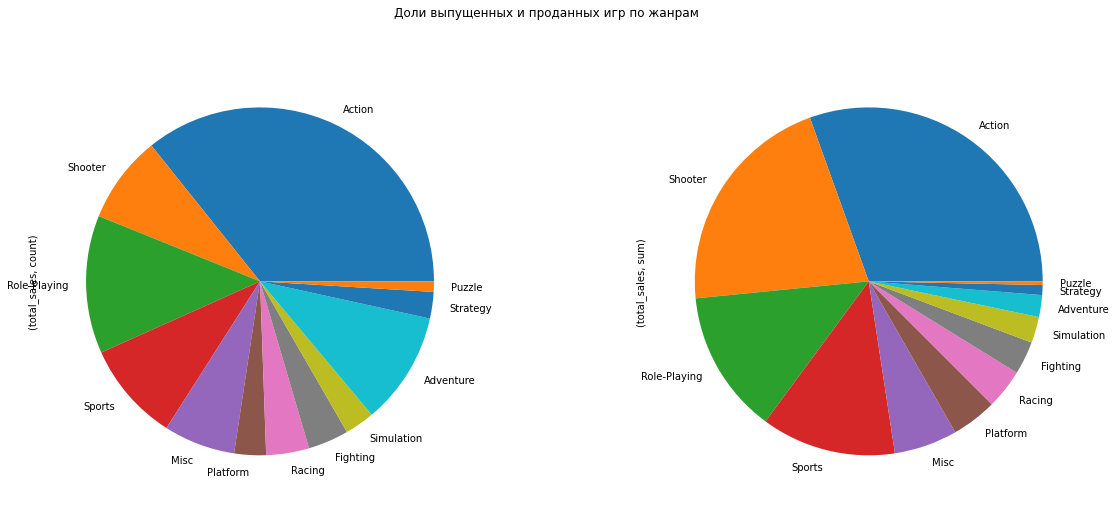

In [30]:
# посчитаем количество проданных игр каждого жанра, общее количество проданных 
# экземпляров каждого жанра, среднее количество продаж каждой игры по жанру

sales_per_genre = data_actual.groupby(by='genre')\
                      .agg({'total_sales': ['count', 'sum', 'mean']})\
                      .sort_values(by=('total_sales', 'sum'), ascending=False)
sales_per_genre[[('total_sales', 'count'), ('total_sales', 'sum')]]\
                   .plot(kind='bar', title='Распределение выпущенных и проданных игр по жанрам')
sales_per_genre[[('total_sales', 'count'),\
                 ('total_sales', 'sum')]]\
               .plot(kind='pie', subplots=True, figsize=(20,8), legend=False,\
                     title='Доли выпущенных и проданных игр по жанрам')
display(sales_per_genre)

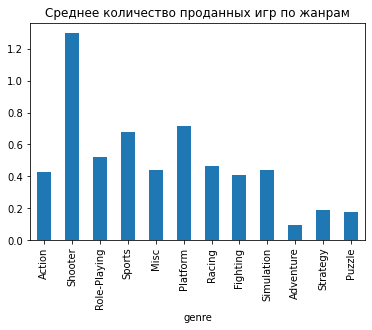

In [31]:
sales_per_genre[('total_sales', 'mean')].plot(kind='bar',\
                                              title='Среднее количество проданных игр по жанрам');

Анализ распределения распределение продаж по жанрам выявил, что четыре самых популярных жанра, в которых выпускаются игры (Action, Shooter, Role-Playing, Sports), также лидируют и по продажам.

Мы подсчитали среднее количество продаж каждой игры по жанрам, выяснили, что больше всего среднее количество продаж каждой игры в жанре Shooter, а также в не самом популярном жанре Platform.

## Составление портрета пользователя каждого региона

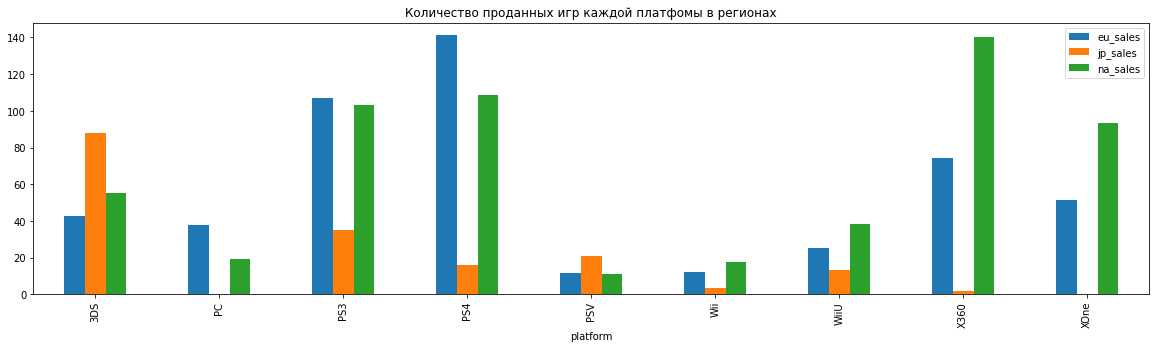

In [32]:
# посчитаем сумму проданных игр каждой из существующих на данный момент платформы по регионам
platform_per_region = data_actual.query('platform in @existing_platform')\
                                 .pivot_table(index='platform',\
                                              values=('na_sales', 'eu_sales', 'jp_sales'),\
                                              aggfunc='sum')
platform_per_region.plot(kind='bar', figsize=(20,5),\
                         title='Количество проданных игр каждой платфомы в регионах');

In [33]:
# определим 5 самых популярных платформ в регионе и долю продаж по ним
for region in platform_per_region.columns:
    platform_per_region['rate'] = platform_per_region[region] / platform_per_region[region].sum()
    display(platform_per_region.sort_values(by=region, ascending=False)[[region, 'rate']].head(5))
    print('Доля продаж пяти самых популярных платформ:', platform_per_region\
          .sort_values(by=region, ascending=False).head(5)['rate'].sum().round(2))

,eu_sales,rate
platform,,
PS4,141.09,0.280575
PS3,106.85,0.212485
X360,74.52,0.148192
XOne,51.59,0.102593
3DS,42.64,0.084795


Доля продаж пяти самых популярных платформ: 0.83


,jp_sales,rate
platform,,
3DS,87.79,0.492124
PS3,35.29,0.197825
PSV,21.04,0.117944
PS4,15.96,0.089467
WiiU,13.01,0.072930


Доля продаж пяти самых популярных платформ: 0.97


,na_sales,rate
platform,,
X360,140.05,0.238891
PS4,108.74,0.185484
PS3,103.38,0.176341
XOne,93.12,0.158840
3DS,55.31,0.094345


Доля продаж пяти самых популярных платформ: 0.85


Мы посчитали количество проданных игр каждой платформы в регионах Северная Америка, Европа и Япония. Выявили, что больше всего игр продается в Северной Америке и Европе, меньше - в Японии. Проанализировали популярность платформ в регионах, выяснили что в разных регионах популярны разные платформы. Северная Америка и Европа в этом смысле более похожи между собой, а Япония существенно отличается. Выявили, что такие платформы как 3DS и PSV больше ориенированы на Японию.

Мы составили рейтинг ТОП-5 самых популярных платформ в регионе. В Северной Америке это: X360, PS4, PS3, XOne, 3DS. В Европе: PS4, PS3, X360, XOne, 3DS. В Японии: 3DS, PS3, PSV, PS4, WiiU. Доля продаж пяти самых популярных платформ в Японии составляет 97%, в Северной Америке 85%, в Европе - 83%.

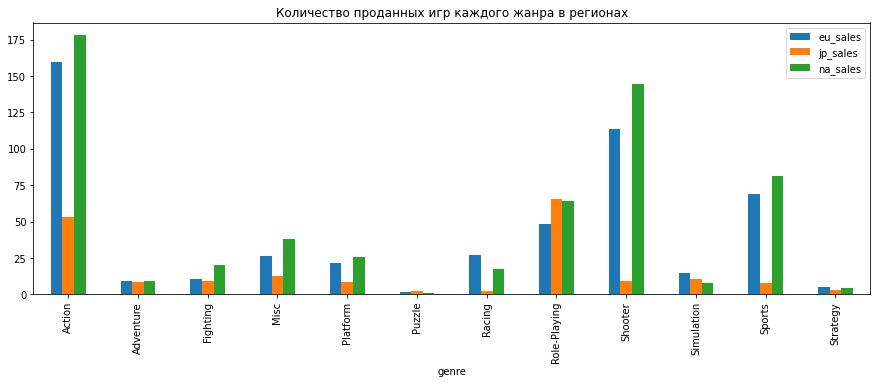

In [34]:
# посчитаем сумму проданных игр каждого жанра по регионам
genre_per_region = data_actual.pivot_table(index='genre',\
                             values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
genre_per_region.plot(kind='bar', figsize=(15,5),\
                      title='Количество проданных игр каждого жанра в регионах');

In [35]:
# определим 5 самых популярных жанров в регионе и долю продаж по ним
for genre in genre_per_region.columns:
    genre_per_region['rate'] = genre_per_region[genre] / genre_per_region[genre].sum()
    display(genre_per_region.sort_values(by=genre, ascending=False)[[genre, 'rate']].head(5));
    print('Доля продаж пяти самых популярных жанров:', genre_per_region\
          .sort_values(by=region, ascending=False).head(5)['rate'].sum().round(2))

,eu_sales,rate
genre,,
Action,159.34,0.314398
Shooter,113.47,0.223891
Sports,69.08,0.136304
Role-Playing,48.53,0.095756
Racing,27.29,0.053847


Доля продаж пяти самых популярных жанров: 0.82


,jp_sales,rate
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


Доля продаж пяти самых популярных жанров: 0.77


,na_sales,rate
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623


Доля продаж пяти самых популярных жанров: 0.86


Мы посчитали количество проданных игр каждого жанра в регионах Северная Америка, Европа и Япония. Проанализировали популярность жанров в регионах, выяснили что в разных регионах популярны разные жанры. Северная Америка и Европа в этом смысле более похожи между собой, а Япония отличается. Жанр Racing популярнее в Европе, в Японии популярен жанр Role-Playing. Указанные данные позволяют сделать вывод, что культурные особенности влияют на выбор жанра игры.

Мы составили рейтинг ТОП-5 самых популярных жанров в регионе. В Северной Америке это: Action, Shooter, Sports, Role-Playing, Misc. В Европе: Action, Shooter, Sports, Role-Playing, Racing. В Японии: Role-Playing, Action, Misc, Simulation, Fighting. Доля продаж пяти самых популярных жанров в Японии составляет 77%, в Европе - 82%, в Северной Америке - 86%.

In [36]:
# посчитаем сумму и среднее количество проданных игр каждой возрастной категории по регионам
sales_by_rating = data_actual.groupby(by='rating')\
                      .agg({'total_sales': 'count',\
                            'na_sales': 'sum',\
                            'eu_sales': 'sum',\
                            'jp_sales': 'sum'})\
                       .sort_values(by='total_sales', ascending=False)

display(sales_by_rating)

,total_sales,na_sales,eu_sales,jp_sales
rating,,,,
undefined,1275,103.31,91.50,108.84
M,498,231.57,193.96,21.20
T,412,66.02,52.96,26.02
E,394,114.37,113.02,28.33
E10+,306,75.70,55.37,8.19


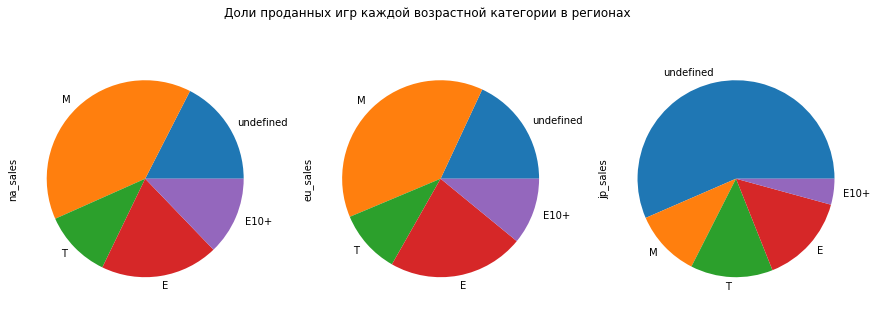

In [37]:
# построим круговые диаграммы долей проданных игр по каждой возрастной категории
sales_by_rating[['na_sales', 'eu_sales', 'jp_sales']]\
               .plot(kind='pie', subplots=True, figsize=(15,5), legend=False,\
                     title='Доли проданных игр каждой возрастной категории в регионах');

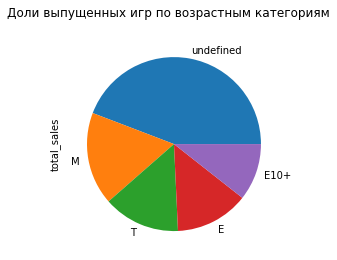

In [38]:
sales_by_rating[['total_sales']]\
               .plot(kind='pie', subplots=True, legend=False,\
                     title='Доли выпущенных игр по возрастным категориям');

Мы посчитали количество проданных игр каждой возрастной категории в регионах Северная Америка, Европа и Япония. Существует большое количество игр, по которым возрастная категория (рейтинг организации ESRB) не определена. В Японии возрастная категория определена для меньше, чем половины проданных игр. В основном организация ESRB ориентирована на Северную Америку и Европу, для более точного анализа игр по  возрастным категориям в Японии нужны данные о рейтинге, который проставляется в Японии.

В Северной Америке и Европе распределение количества проданных игр по возрастным категориям примерно одинаково, в Европе продано чуть меньше игр категориии E10+ и чуть больше категории E. Доля продаж игр категории E10+ примерно одинакова во всех регионах. В Японии больше всего продаются игры категории E и T, чуть меньше категории M и существенно меньше категории E10+.

Можно сделать вывод, что в Японии в компьютерные игры играют в основном дети, а в Европе и Северной Америке взрослые играют гораздо больше.

## Проверка гипотез

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One (XOne) = cредний пользовательский рейтинг (user_score) платформы PC.
H_a: Средний пользовательский рейтинг (user_score) платформы Xbox One (XOne) ≠ cредний пользовательский рейтинг (user_score) платформы PC.
alpha = 0.05
```

In [39]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data_actual[(data_actual['platform'] =='XOne')\
                                   & (data_actual['user_score'] > 0)]['user_score'],\
                       data_actual[(data_actual['platform'] =='PC')\
                                   & (data_actual['user_score'] > 0)]['user_score'])

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу 


Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = cредний пользовательский рейтинг (user_score) жанра Sports.
H_a: Средний пользовательский рейтинг (user_score) жанра Action ≠ cредний пользовательский рейтинг (user_score) жанра Sports.
alpha = 0.05
```

In [40]:
# results = вызов метода для проверки гипотезы за актуальный период
results = st.ttest_ind(data_actual[(data_actual['genre'] == 'Action')\
                            & (data_actual['user_score'] >= 0)]['user_score'],
                       data_actual[(data_actual['genre'] == 'Sports')\
                            & (data_actual['user_score'] >= 0)]['user_score'])

# alpha = задайте значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

4.8045233804629176e-26
Отвергаем нулевую гипотезу 


Мы проверяли гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Пороговое значение alpha задали 0.05.

Нулевой гипотезой было, что средний пользовательский рейтинг одинаковый.

В первом случае (сравнение платформ Xbox One и PC) нулевую гипотезу не получилось отвергнуть. Значение p-value в этой проверке получилось очень большим.

Во втором случае (сравнение жанров Action и Sports) нулевая гипотеза была отвергнута. Значение p-value в этой проверке получилось очень маленьким.

## Общий вывод

Мы провели исследование данных о продажах компьютерных игр, основываясь на имеющихся в нашем распоряжении исторических данных о продажах игр: о платформе, жанре, продажах в различных регионах, оценках пользователей и критиков, возрастной категории от организации ESRB.

Целью исследования было выявление закономерностей, определяющих успешность игры.

Строки с пропусками в данных года выпуска и название удалили, таких строк было немного, заполнить корректным значением невозможно.

Обнаружили, что по значительной части игр данные об оценках пользователей и критиков, а также о возрастной категории от организации ESRB не представлены, в целом такие данные представляют только 17 из 31 найденных платформ. Решили не заполнять данные по оценкам пользователей и критиков, так как такая оценка субъективна. Столбец `rating` заполнили индикаторным значением `undefined`.

Анализ продаж игр по годам показал, что в 2005 - 2011 годах были самые большие продажи игр, потом продажи существенно снизились и тенденция к снижению продолжается. В дальнейшем для анализа мы брали данные за 2012 - 2016 годы.

Мы нашли 9 существующих на 2016 год платформ, проанализировали продажи по ним по годам, увидели что продажи по всем платформам падают. Не так сильно падают продажи игр на платформах PSV и Wii. Нашли платформы с самыми большими продажами за последние 5 лет. Создали список 5 таких платформ, в него вошли следующие платфомы: PS4, PS3, X360, 3DS, XOne.

У платформы PS3 самый большой разброс в продажах по годам. С 2013 по 2015 год эта платформа сильно упала. В целом у самых популярных платформ сильнее всех упали продажи за анализируемый период. Медианное количество продаж игр по годам на платформе PS3 меньше, чем на платформе PS4.

Анализ распределения глобальных продаж по платформам показал, что в продажах игр существуют сильные выбросы, то есть небольшое количество игр продается существенно лучше других. Если говорить о медианном количестве продаж каждой игры, то больше всего оно у платформы X360, далее следуют платформы Wii и XOne, еще чуть ниже WiiU, PS3 и PS4.

Потенциально самыми прибыльными платформами мы считаем следуюие: X360, PS4, Wii, XOne, PS3, WiiU.

Анализ влияния оценов критиков и пользователей на продажи показал, что большое количество продаж есть у игр с более высокими оценками пользователей и критиков. Но тем не менее есть игры с высокими оценками и низкими продажами. Существует более сильная зависимость между оценкой критиков и продажами, чем между оценкой пользоваталей и продажами, но в общем зависимость между этими показателями не большая.

Анализ распределения распределение продаж по жанрам выявил, что четыре самых популярных жанра, в которых выпускаются игры (Action, Shooter, Role-Playing, Sports), также лидируют и по продажам.

Среднее количество продаж каждой игры лучше других в жанре Shooter, а также в не самом популярном жанре Platform.

Мы проанализировали продажи в зависимости от региона: Северная Америка, Европа и Япония. Больше всего игр продается в Северной Америке и Европе, меньше - в Японии.

Анализ популярности платформ в регионах выявил, что Северная Америка и Европа в этом смысле более похожи между собой, а Япония существенно отличается. Такие платформы как 3DS и PSV больше ориенированы на Японию, что следует учитывать при планировании продаж.

Мы составили рейтинг ТОП-5 самых популярных платформ в регионе. В Северной Америке это: X360, PS4, PS3, XOne, 3DS. В Европе: PS4, PS3, X360, XOne, 3DS. В Японии: 3DS, PS3, PSV, PS4, WiiU. Доля продаж пяти самых популярных платформ в Японии составляет 97%, в Северной Америке 85%, в Европе - 83%.

Анализ популярности жанров игр в регионах также выявил, что Северная Америка и Европа в этом смысле более похожи между собой, а Япония отличается. Жанр Racing популярнее в Европе, в Японии популярен жанр Role-Playing.

Мы составили рейтинг ТОП-5 самых популярных жанров в регионе. В Северной Америке это: Action, Shooter, Sports, Role-Playing, Misc. В Европе: Action, Shooter, Sports, Role-Playing, Racing. В Японии: Role-Playing, Action, Misc, Simulation, Fighting. Доля продаж пяти самых популярных жанров в Японии составляет 77%, в Европе - 82%, в Северной Америке - 86%.

Мы посмотрели на продажи игр по возрастным категориям (рейтинг организации ESRB) в регионах. Существует большое количество игр, по которым возрастная категория не определена. В Японии возрастная категория определена для меньше, чем половины проданных игр.

В Северной Америке и Европе распределение количества проданных игр по возрастным категориям примерно одинаково, в Европе продано чуть меньше игр категориии E10+ и чуть больше категории E.Доля продаж игр категории E10+ примерно одинакова во всех регионах. В Японии больше всего продаются игры категории E и T, чуть меньше категории M и существенно меньше категории E10+.

Можно сделать вывод, что в Японии в компьютерные игры играют в основном дети, а в Европе и Северной Америке взрослые играют гораздо больше. Для более точного анализа игр по  возрастным категориям в Японии нужны данные о рейтинге, который проставляется в Японии.

Мы проверили следующие гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports одинаковые.

В первом случае (сравнение платформ Xbox One и PC) гипотезу о том, что средний пользовательский рейтинг одинаковый не получилось отвергнуть. 

Во втором случае (сравнение жанров Action и Sports) гипотеза была отвергнута.